# [LDSSA Hackathon 4] - Research Fields Prediction (NLP Specialization)

This notebook aims to predict scientific disciplines using NLP-based features.

* Author: Jessica Rodrigues
* Date: 01-02-2025

In [1]:
import warnings
from pathlib import Path

In [2]:
# project directory
project_dir = Path(".").resolve().parent
warnings.filterwarnings("ignore")

## 1. Data

In this section, we are going to perform the Exploratory Data Analysis and the pre-processing of training, and test sets.

In [3]:
import pandas as pd
from src.data.read_dataset import get_data
pd.set_option('display.max_colwidth', None)

### 1.1 ArXiv Dataset

ArXiv is a major preprint server that provides open access to scholarly articles across a wide array of fields. These fields range from computer science to various subdisciplines of physics, as well as math, statistics, electrical engineering, quantitative biology, economics, and more. The ArXiv dataset (https://arxiv.org/) contains approximately 1.7 million papers, of which 167,767 are STEM papers (science, technology, engineering, and mathematics).

Our reduced version is a csv file and the columns are: Abstract, Publication Year, and Category (label). The file must be inside the **./data/processed/** directory and the extension must be .csv:

* **Category**: is a multiclass variable, indicating five different research fields: Computer Vision and Pattern Recognition, Machine Learning, Computation and Language, Human-Computer Interaction, and Information Retrieval.

In [4]:
TRAIN_FILE = project_dir / "data" / "processed" / "train.csv"
TEST_FILE = project_dir / "data" / "processed" / "test.csv"

In [5]:
df_train = pd.read_csv(TRAIN_FILE, delimiter=",", header=0, encoding='utf-8', engine='python')
df_test = pd.read_csv(TEST_FILE, delimiter=",", header=0, encoding='utf-8', engine='python')

In [6]:
df_train

,Abstract,Year,Category,label
0,The importance repetition music well-known . In paper study music repetition context effective efficient automatic genre classification large-scale music-databases . We aim enhancing access organization piece music Digital Libraries allowing automatic categorization entire collection considering musical content . We handover public set genre-specific pattern support research musicology . The pattern used instance explore analyze relation musical genre . There many existing algorithm could used identify extract repeating pattern symbolically encoded music . In case extracted pattern used representation piece music underlying corpus consecutively train evaluate classifier automatically identify genre . In paper apply two fast algorithm enabling u experiment large diverse corpus . Thus able find pattern strong discrimination power used various application . We carried experiment corpus containing 40000 MIDI file annotated least one genre . The experiment suggest approach scalable capable dealing real-world-size music collection .,2018,Information Retrieval,3
1,Weakly supervised semantic segmentation ( WSSS ) image-level supervision challenging task . Most existing method exploit Class Activation Maps ( CAM ) generate pixel-level pseudo label supervised training . However due local receptive field Convolution Neural Networks ( CNN ) CAM applied CNNs often suffers partial activation -- highlighting discriminative part instead entire object area . In order capture local feature global representation Conformer proposed combine visual transformer branch CNN branch . In paper propose TransCAM Conformer-based solution WSSS explicitly leverage attention weight transformer branch Conformer refine CAM generated CNN branch . TransCAM motivated observation attention weight shallow transformer block able capture low-level spatial feature similarity attention weight deep transformer block capture high-level semantic context . Despite simplicity TransCAM achieves new state-of-the-art performance 69.3 % 69.6 % respective PASCAL VOC 2012 validation test set showing effectiveness transformer attention-based refinement CAM WSSS .,2023,Computer Vision and Pattern Recognition,1
2,Multi-view learning progressed rapidly recent year . Although many previous study assume instance appears view common real-world application instance missing view resulting incomplete multi-view data . To tackle problem propose novel Latent Heterogeneous Graph Network ( LHGN ) incomplete multi-view learning aim use multiple incomplete view fully possible flexible manner . By learning unified latent representation trade-off consistency complementarity among different view implicitly realized . To explore complex relationship sample latent representation neighborhood constraint view-existence constraint proposed first time construct heterogeneous graph . Finally avoid inconsistency training test phase transductive learning technique applied based graph learning classification task . Extensive experimental result real-world datasets demonstrate effectiveness model existing state-of-the-art approach .,2022,Machine Learning,4
3,Transfer learning proven effective technique neural machine translation low-resource condition . Existing method require common target language language relatedness specific training trick regime . We present simple transfer learning method first train `` parent `` model high-resource language pair continue training lowresource pair replacing training corpus . This `` child `` model performs significantly better baseline trained lowresource pair . We first show targeting different language observe improvement even unrelated language different alphabet .,2018,Computation and Language,0
4,Bundle recommendation aim recommend user bundle item whole . Nevertheless usually neglect diversity user 's intent adopting item fail disentangle user 's intent representation . In real scenario bundle recommendation user 's intent may natura

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3697 entries, 0 to 3696
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Abstract  3697 non-null   object
 1   Year      3697 non-null   int64 
 2   Category  3697 non-null   object
 3   label     3697 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 115.7+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Abstract  925 non-null    object
 1   Year      925 non-null    int64 
 2   Category  925 non-null    object
 3   label     925 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 29.0+ KB


In [9]:
df_train.describe()

,Year,label
count,3697.000000,3697.000000
mean,2019.899648,1.990262
std,3.824115,1.493098
min,2001.000000,0.000000
25%,2018.000000,1.000000
50%,2021.000000,1.000000
75%,2023.000000,4.000000
max,2024.000000,4.000000


In [10]:
df_test.describe()

,Year,label
count,925.000000,925.000000
mean,2020.007568,1.988108
std,3.846479,1.493445
min,2001.000000,0.000000
25%,2019.000000,1.000000
50%,2021.000000,1.000000
75%,2023.000000,4.000000
max,2024.000000,4.000000


### 1.2 Exploratory Data Analysis

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Checking the missing data
df_train.isnull().sum().sort_values(ascending=False)

Abstract    0
Year        0
Category    0
label       0
dtype: int64

In [13]:
# Checking the duplicate data
df_train.duplicated().sum()

0

In [14]:
# Removing duplicates
df_train = df_train.drop_duplicates()

In [15]:
# Checking class distribution
df_train["Category"].value_counts()

Category
Computer Vision and Pattern Recognition    1553
Machine Learning                           1136
Computation and Language                    483
Human-Computer Interaction                  314
Information Retrieval                       211
Name: count, dtype: int64

In [16]:
# Checking class distribution
df_test["Category"].value_counts()

Category
Computer Vision and Pattern Recognition    389
Machine Learning                           284
Computation and Language                   121
Human-Computer Interaction                  79
Information Retrieval                       52
Name: count, dtype: int64

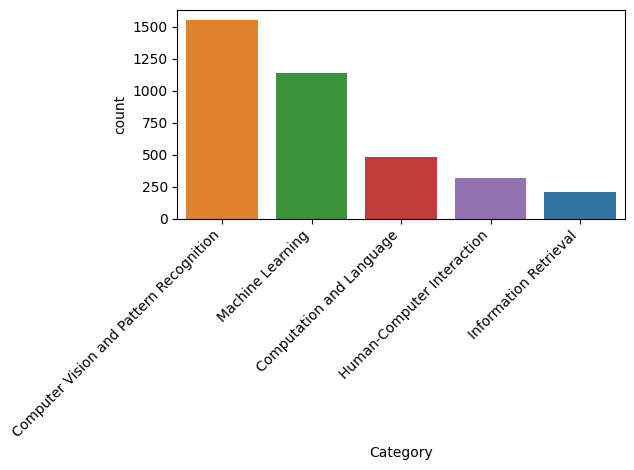

In [17]:
# Calculate the value counts and sort in descending order
sorted_categories = df_train['Category'].value_counts().sort_values(ascending=False).index
sns.countplot(x = df_train['Category'], hue = df_train['Category'], order = sorted_categories)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

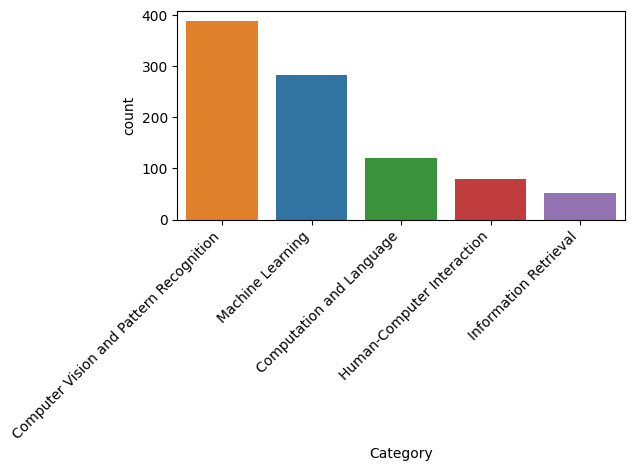

In [18]:
# Calculate the value counts and sort in descending order
sorted_categories = df_test['Category'].value_counts().sort_values(ascending=False).index
sns.countplot(x = df_test['Category'], hue = df_test['Category'], order = sorted_categories)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## 2. Training

In this section, we are going to adopt a  Logistic Regression classifier as a baseline and a pre-trained language model as our model. We are going to fine-tune our model on the ArXiv dataset (train and dev splits).

To establish a baseline, we use **Logistic Regression**, a simple yet effective classifier for text classification tasks. The key reasons for using it as a baseline are:
* It is computationally efficient.
* It provides interpretability.
* It helps measure the improvement gained by using more complex models.

Since our input data consists of research paper abstracts, we need to preprocess the text before training the model. The **preprocessing pipeline** includes:
* Tokenization: Splitting text into words using WordPunctTokenizer().
* Stemming: Reducing words to their root form using SnowballStemmer().
* Text Cleaning: Removing unwanted characters (e.g., HTML tags).

**Feature Extraction**:
* CountVectorizer(): Converts text into a bag-of-words representation or
* TfidfTransformer(): Converts word counts into TF-IDF scores, giving more weight to important words.

**Training**:
* The preprocessed text is used to train a Logistic Regression classifier with max_iter=10,000 to ensure convergence.
* We implement this approach using a Scikit-learn pipeline, which automates preprocessing and training.
* The BaselinePredict class encapsulates the pipeline functionality, handling both training and predictions.

In [19]:
from src.models.train_model import TransformerFineTuning
from src.models.baseline import BaselinePredict
from src.models.predict_model import TransformerPredict

In [20]:
# Models
MY_MODEL = "allenai/scibert_scivocab_uncased"
BASELINE_MODEL = "LogisticRegression"

### [BONUS!] 2.1 SciBERT

We used the [Transformers library](https://huggingface.co/docs/transformers/index) provided by the Hugging Face with the following pre-trained model:

* **allenai/scibert_scivocab_uncased**: **SciBERT** is a pre-trained language model specifically designed for scientific text. Developed by the Allen Institute for AI, it is based on the BERT (Bidirectional Encoder Representations from Transformers) architecture but trained on a large multi-domain scientific corpus rather than general language data.

Key Features:
* **Domain-Specific Training**: Trained on 1.14M scientific papers from Semantic Scholar across biomedical and computer science domains.
* **Vocabulary Optimization**: Uses SciVocab, a domain-specific vocabulary derived from scientific texts, instead of the original BERT WordPiece vocabulary.
* **Performance**: Outperforms BERT in scientific NLP tasks such as named entity recognition (NER), relation extraction, text classification, and sentence similarity.
* **Bidirectional Contextual Understanding**: Like BERT, it captures deep contextual relationships in text, making it effective for complex scientific language.

Common Applications:
* Scientific text classification
* Information retrieval from research papers
* Named entity recognition (NER) for scientific terms
* Relation extraction between scientific concepts

In [21]:
# Fine-tune my model
TransformerFineTuning(MY_MODEL).train()

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at allenai/scibert_scivocab_uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.txt:   0%|          | 0.00/228k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

Map:   0%|          | 0/3697 [00:00<?, ? examples/s]

Map:   0%|          | 0/925 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.395609,0.872432,0.883394,0.872432,0.873971
2,No log,0.329913,0.888649,0.888164,0.888649,0.888344
3,0.414200,0.384990,0.895135,0.896196,0.895135,0.895001
4,0.414200,0.388568,0.903784,0.903640,0.903784,0.903466


## 3. Prediction

In this section, we are going to predict the probabilities of label 0 (**Computation and Language**), label 1 (**Computer Vision and Pattern Recognition**), label 2 (**Human-Computer Interaction**), label 3 (**Information Retrieval**) and label 4 (**Machine Learning**)  for the test cases.

In [22]:
COMPARE_MY_MODEL = True
COMPARE_BASELINE_MODEL = True

In [23]:
# Do I have my baseline model available?
if COMPARE_BASELINE_MODEL and BASELINE_MODEL not in df_test:

    model = BaselinePredict(BASELINE_MODEL)
    df_test[BASELINE_MODEL] = df_test.Abstract.apply(lambda row: model.predict(row)[0])

In [ ]:
# Do I have my distilbert model available?
if COMPARE_MY_MODEL and MY_MODEL not in df_test:
    
    MODEL_PATH = project_dir / "model" / "best_model"
    
    if not MODEL_PATH.exists():
        raise FileNotFoundError("Failed to load the model")

    model = TransformerPredict(MODEL_PATH)
    
    df_test[MY_MODEL] = df_test.Abstract.apply(lambda row: model.predict(str(row))[0]["label"])
    df_test[MY_MODEL] = df_test[MY_MODEL].apply(lambda row: int(row.split('_')[1]))

In [25]:
df_test

,Abstract,Year,Category,label,LogisticRegression,allenai/scibert_scivocab_uncased
0,Implementing existing federated learning massive Internet Things ( IoT ) network face critical challenge imbalanced statistically heterogeneous data device diversity . To end propose semi-federated learning ( SemiFL ) framework provide potential solution realization intelligent IoT . By seamlessly integrating centralized federated paradigm SemiFL framework show high scalability term number IoT device even presence computing-limited sensor . Furthermore compared traditional learning approach proposed SemiFL make better use distributed data computing resource due collaborative model training edge server local device . Simulation result show effectiveness SemiFL framework massive IoT network . The code found http : //github.com/niwanli/SemiFL_IoT .,2023,Machine Learning,4,4,4
1,We present accurate stereo matching method using local expansion move based graph cut . This new move-making scheme used efficiently infer per-pixel 3D plane label pairwise Markov random field ( MRF ) effectively combine recently proposed slanted patch matching curvature regularization term . The local expansion move presented many alpha-expansions defined small grid region . The local expansion move extend traditional expansion move two way : localization spatial propagation . By localization use different candidate alpha-labels according location local alpha-expansions . By spatial propagation design local alpha-expansions propagate currently assigned label nearby region . With localization spatial propagation method efficiently infer MRF model continuous label space using randomized search . Our method several advantage previous approach based fusion move belief propagation ; produce submodular move deriving subproblem optimality ; help find good smooth piecewise linear disparity map ; suitable parallelization ; use cost-volume filtering technique accelerating matching cost computation . Even using simple pairwise MRF method shown best performance Middlebury stereo benchmark V2 V3 .,2018,Computer Vision and Pattern Recognition,1,1,1
2,In work present novel approach 3D layout recovery indoor environment using non-central acquisition system . From non-central panorama full scaled 3D line independently recovered geometry reasoning without geometric scale assumption . However sensitivity noise complex geometric modeling led panorama little investigated . Our new pipeline aim extract boundary structural line indoor environment neural network exploit property non-central projection system new geometrical processing recover scaled 3D layout . The result experiment show improve state-of-the-art method layout reconstruction line extraction non-central projection system . We completely solve problem Manhattan Atlanta environment handling occlusion retrieving metric scale room without extra measurement . As far author knowledge go approach first work using deep learning non-central panorama recovering scaled layout single panorama .,2022,Computer Vision and Pattern Recognition,1,1,1
3,Real data often appear form multiple incomplete view . Incomplete multi-view clustering effective method integrate incomplete view . Previous method learn consistent information different view ignore unique information view limit clustering performance generalization . To overcome limitation propose novel View Variation View Heredity approach ( V3H ) . Inspired variation heredity genetics V3H first decomposes subspace variation matrix corresponding view heredity matrix view represent unique information consistent information respectively . Then aligning different view based cluster indicator matrix V3H integrates unique information different view improve clustering performance . Finally help adjustable low-rank representation based heredity matrix V3H recovers underlying true data structure reduce influence large incompleteness . More importantly V3H present possibly first work introduce genetics clus

## 4. Evaluation

In this section, we are going to use different evaluation metrics to report the performance in the test set. The following metrics will be used: 

* **Classification metrics** (precision, recall, f-score).

In [26]:
import numpy as np
from sklearn.metrics import roc_curve, auc

### 4.1. Multiclass Classification

In this section, we want to measure the performance of a classification setup. In this way, we want to predict the label in the test set by using the probability score provided by the model.

#### 4.1.1. Classification Report

For each one of the classification classes, we can mesure the following classification metrics:

* **precision** - TP / (TP + FP) - the number of correcly classified in this class divided by the total number of elements labelled as belonging to the given class [[ref](https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context))];
* **recall** - TP / (TP + FN) - the number of correcly classified in this class divided by the total number of elements that actually belong to this class [[ref](https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context))];
* **f1** - 2*(precion+recall)/(precision+recall) - weighted average of the precision and recall.

In addition, for each classifier, disregarding the class, we can measure the overall accuracy:

* **accuracy** - the number of correctly classified over the number of all sentences, i.e, (TP+TN) / (TP+TN+FP+FN)

In [27]:
from sklearn.metrics import classification_report

In [28]:
y_true = df_test["label"]

In [29]:
# performance baseline
y_pred = df_test[BASELINE_MODEL]
print(classification_report(y_true, y_pred, target_names=["Computation and Language", "Computer Vision and Pattern Recognition", "Human-Computer Interaction", "Information Retrieval", "Machine Learning"]))

                                         precision    recall  f1-score   support

               Computation and Language       0.93      0.92      0.92       121
Computer Vision and Pattern Recognition       0.93      0.98      0.96       389
             Human-Computer Interaction       0.98      0.73      0.84        79
                  Information Retrieval       0.94      0.63      0.76        52
                       Machine Learning       0.90      0.96      0.93       284

                               accuracy                           0.92       925
                              macro avg       0.94      0.84      0.88       925
                           weighted avg       0.93      0.92      0.92       925



In [30]:
# performance my model
y_pred = df_test[MY_MODEL]
print(classification_report(y_true, y_pred, target_names=["Computation and Language", "Computer Vision and Pattern Recognition", "Human-Computer Interaction", "Information Retrieval", "Machine Learning"]))

                                         precision    recall  f1-score   support

               Computation and Language       0.90      0.97      0.93       121
Computer Vision and Pattern Recognition       0.96      0.97      0.97       389
             Human-Computer Interaction       0.96      0.86      0.91        79
                  Information Retrieval       0.84      0.83      0.83        52
                       Machine Learning       0.94      0.92      0.93       284

                               accuracy                           0.94       925
                              macro avg       0.92      0.91      0.91       925
                           weighted avg       0.94      0.94      0.94       925

